In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports réussis !")

✅ Imports réussis !


In [2]:
# Charger le dataset California Housing
print("📥 Chargement des données...")

# fetch_california_housing retourne un objet avec .data et .target
california = fetch_california_housing(as_frame=True)

# Créer un DataFrame complet (features + target)
df = california.frame  # DataFrame complet
print(f"✅ Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes")

# Afficher les premières lignes
print("\n📊 Aperçu des données :")
df.head()

📥 Chargement des données...
✅ Données chargées : 20640 lignes, 9 colonnes

📊 Aperçu des données :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Informations générales
print("📋 Informations sur le dataset :")
print(f"  • Nombre de lignes : {df.shape[0]:,}")
print(f"  • Nombre de colonnes : {df.shape[1]}")
print(f"\n📊 Colonnes disponibles :")
for col in df.columns:
    print(f"  • {col}")

print("\n📈 Types de données :")
print(df.dtypes)

print("\n💾 Mémoire utilisée :")
print(f"  {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📋 Informations sur le dataset :
  • Nombre de lignes : 20,640
  • Nombre de colonnes : 9

📊 Colonnes disponibles :
  • MedInc
  • HouseAge
  • AveRooms
  • AveBedrms
  • Population
  • AveOccup
  • Latitude
  • Longitude
  • MedHouseVal

📈 Types de données :
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

💾 Mémoire utilisée :
  1.42 MB


In [4]:
# Statistiques descriptives
print("📊 STATISTIQUES DESCRIPTIVES")
print("=" * 60)

stats = df.describe()
print(stats)

print("\n📌 OBSERVATIONS :")
print(f"  • Prix moyen : ${stats.loc['mean', 'MedHouseVal'] * 100000:,.0f}")
print(f"  • Prix médian : ${stats.loc['50%', 'MedHouseVal'] * 100000:,.0f}")
print(f"  • Prix min : ${stats.loc['min', 'MedHouseVal'] * 100000:,.0f}")
print(f"  • Prix max : ${stats.loc['max', 'MedHouseVal'] * 100000:,.0f}")

📊 STATISTIQUES DESCRIPTIVES
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

In [5]:
# Vérification des valeurs manquantes
print(" VÉRIFICATION DES VALEURS MANQUANTES")
print("=" * 60)

missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\n Aucune valeur manquante ! Dataset propre.")
else:
    print(f"\n {missing.sum()} valeurs manquantes trouvées.")

 VÉRIFICATION DES VALEURS MANQUANTES
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

 Aucune valeur manquante ! Dataset propre.


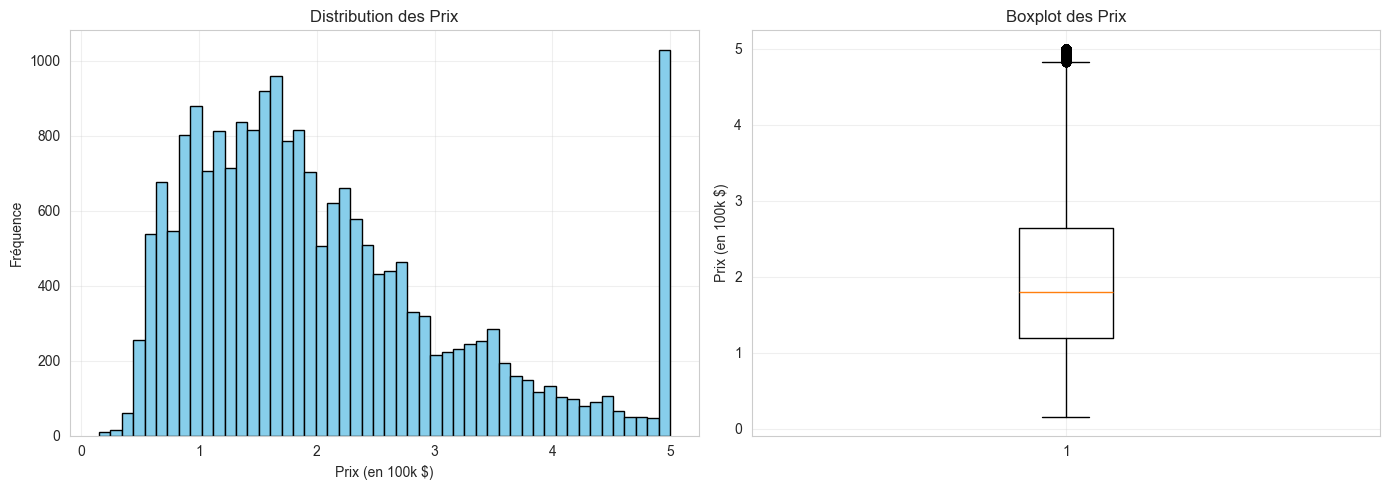

 Observations :
  • La plupart des maisons coûtent entre 1 et 3 (100k-300k $)
  • Quelques valeurs très élevées (>5 = 500k $)
  • Distribution légèrement asymétrique (skewed right)


In [6]:
# Distribution du prix des maisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Prix (en 100k $)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des Prix')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Prix (en 100k $)')
axes[1].set_title('Boxplot des Prix')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Observations :")
print(f"  • La plupart des maisons coûtent entre 1 et 3 (100k-300k $)")
print(f"  • Quelques valeurs très élevées (>5 = 500k $)")
print(f"  • Distribution légèrement asymétrique (skewed right)")

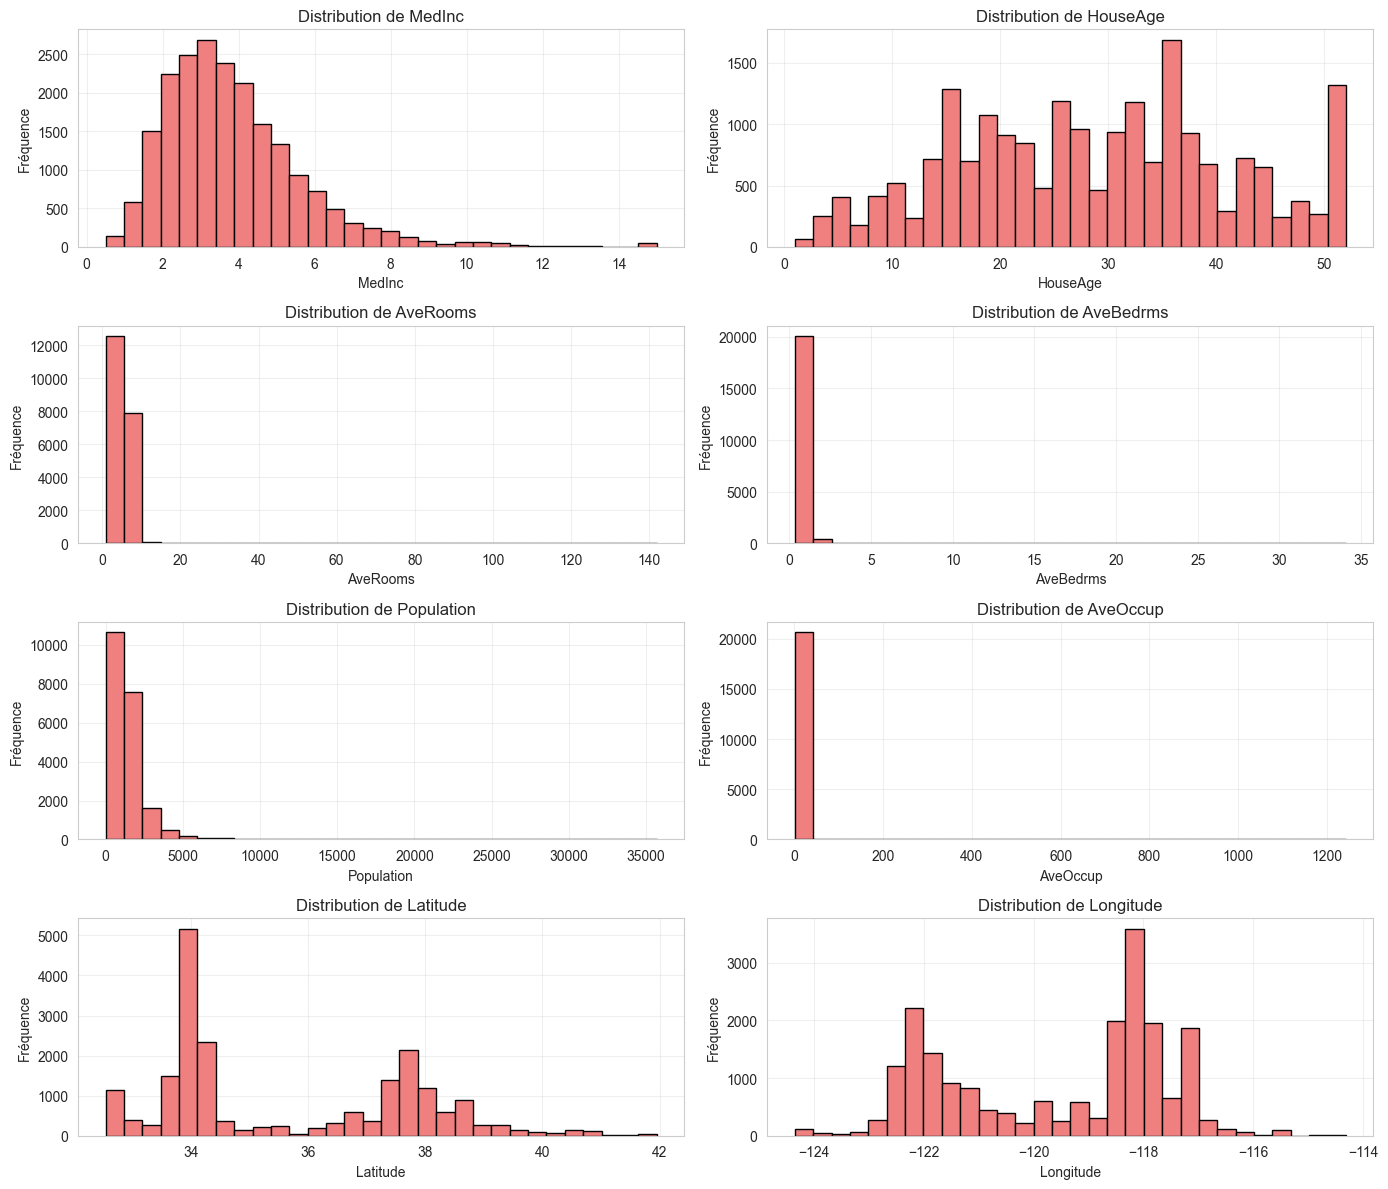

 Visualisations des features créées !


In [7]:
# Distribution de toutes les features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
            'Population', 'AveOccup', 'Latitude', 'Longitude']

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, color='lightcoral', edgecolor='black')
    axes[i].set_title(f'Distribution de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Visualisations des features créées !")

 MATRICE DE CORRÉLATION


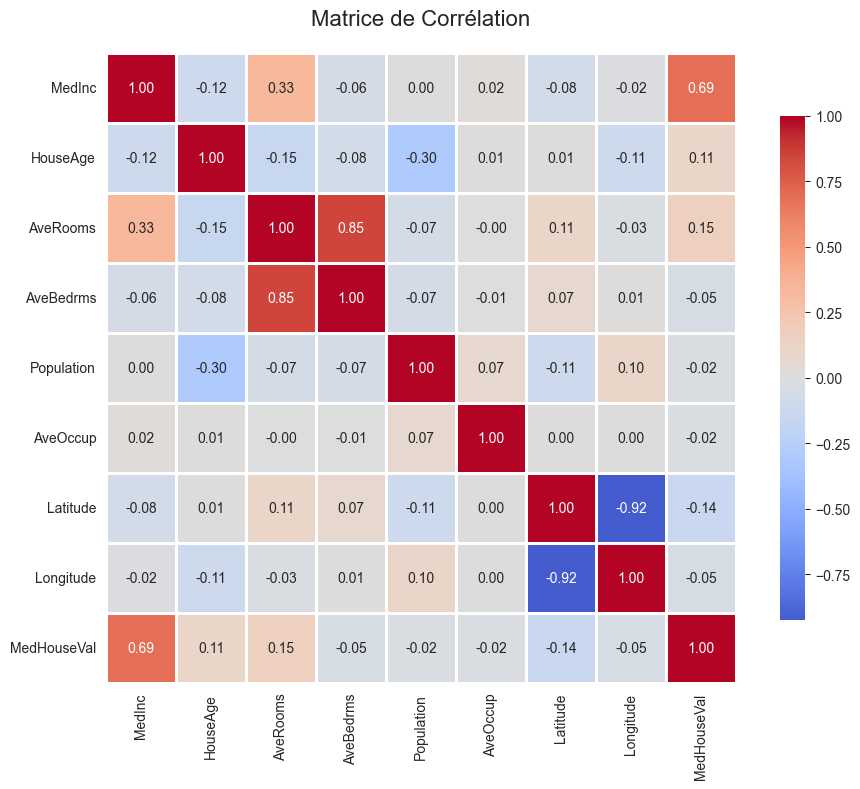


 Corrélations avec le prix (MedHouseVal) :
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [8]:
# Matrice de corrélation
print(" MATRICE DE CORRÉLATION")
print("=" * 60)

correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Corrélations avec la target
print("\n Corrélations avec le prix (MedHouseVal) :")
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)

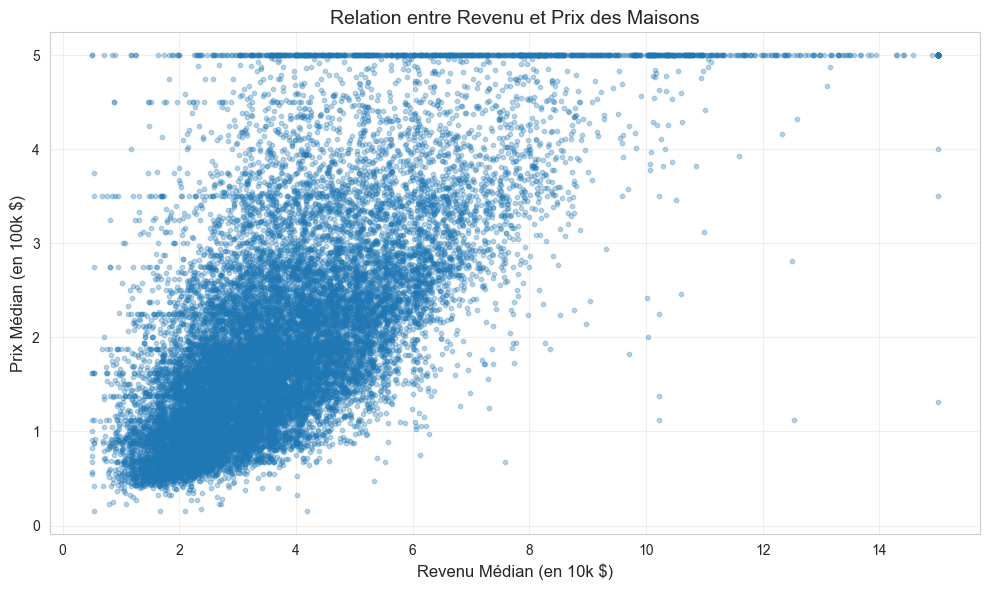

 Observation :
  • Relation clairement positive entre revenu et prix
  • Plus le revenu est élevé, plus les maisons sont chères
  • Quelques outliers (maisons chères dans quartiers à revenu moyen)


In [9]:
# Relation entre revenu et prix
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3, s=10)
plt.xlabel('Revenu Médian (en 10k $)', fontsize=12)
plt.ylabel('Prix Médian (en 100k $)', fontsize=12)
plt.title('Relation entre Revenu et Prix des Maisons', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(" Observation :")
print("  • Relation clairement positive entre revenu et prix")
print("  • Plus le revenu est élevé, plus les maisons sont chères")
print("  • Quelques outliers (maisons chères dans quartiers à revenu moyen)")

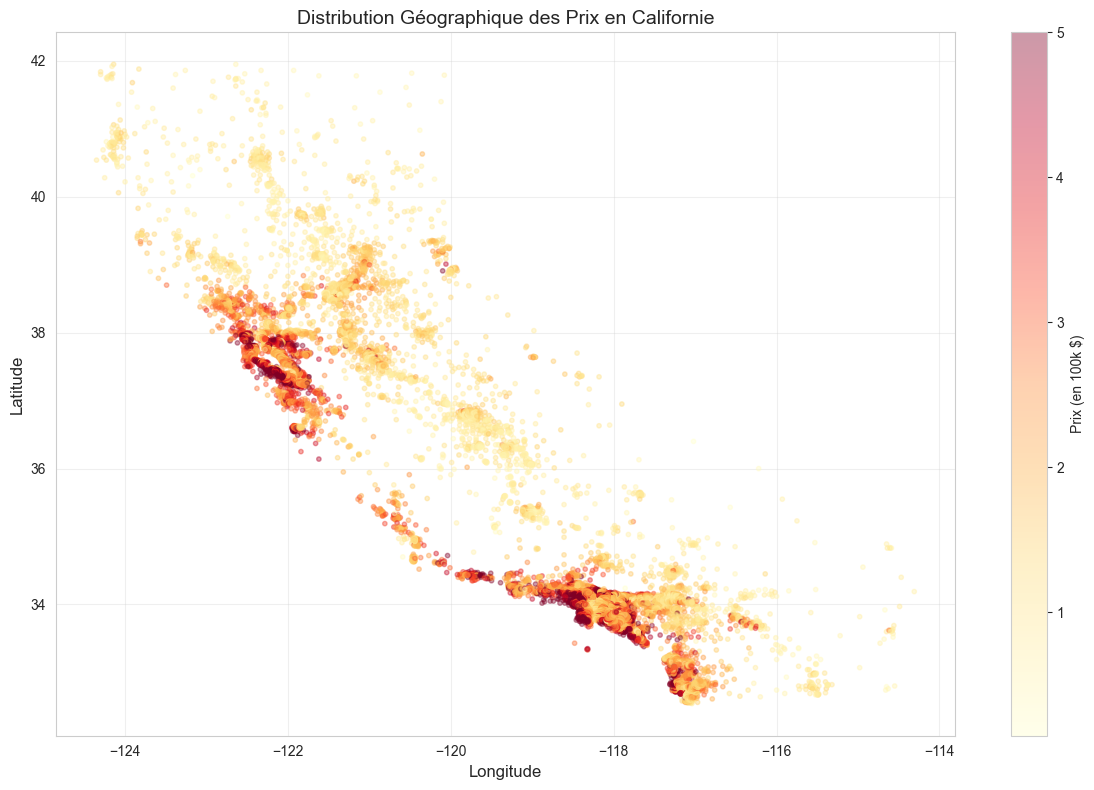

 Observation :
  • Les zones côtières (San Francisco, LA) ont des prix plus élevés
  • L'intérieur des terres a des prix plus bas
  • La géographie est un facteur important !


In [10]:
# Carte géographique des prix
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='YlOrRd', 
                     alpha=0.4, s=10)

plt.colorbar(scatter, label='Prix (en 100k $)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Distribution Géographique des Prix en Californie', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(" Observation :")
print("  • Les zones côtières (San Francisco, LA) ont des prix plus élevés")
print("  • L'intérieur des terres a des prix plus bas")
print("  • La géographie est un facteur important !")

In [11]:
# Préparer les données pour MongoDB
print(" Préparation des données pour MongoDB...")

# Convertir le DataFrame en liste de dictionnaires
# MongoDB stocke des documents JSON
records = df.to_dict('records')

print(f" {len(records)} documents créés")
print(f"\n Exemple de document :")
print(records[0])

 Préparation des données pour MongoDB...
 20640 documents créés

 Exemple de document :
{'MedInc': 8.3252, 'HouseAge': 41.0, 'AveRooms': 6.984126984126984, 'AveBedrms': 1.0238095238095237, 'Population': 322.0, 'AveOccup': 2.5555555555555554, 'Latitude': 37.88, 'Longitude': -122.23, 'MedHouseVal': 4.526}


In [12]:
# Connexion à MongoDB
from pymongo import MongoClient
from dotenv import load_dotenv
import os

# Charger les variables d'environnement
load_dotenv()

print(" Connexion à MongoDB Atlas...")

# Créer le client
mongodb_url = os.getenv("MONGODB_URL")
client = MongoClient(mongodb_url)

# Sélectionner la base de données
db = client["real_estate"]

# Sélectionner la collection
collection = db["properties"]

print(f" Connecté à la base de données '{db.name}'")
print(f" Collection '{collection.name}' sélectionnée")

 Connexion à MongoDB Atlas...
 Connecté à la base de données 'real_estate'
 Collection 'properties' sélectionnée


In [15]:
# Supprimer les anciens documents (si on ré-exécute le notebook)
result = collection.delete_many({})
print(f" {result.deleted_count} anciens documents supprimés")

 20640 anciens documents supprimés


In [16]:
# Insérer tous les documents
print(f" Insertion de {len(records)} documents dans MongoDB...")

result = collection.insert_many(records)

print(f" {len(result.inserted_ids)} documents insérés avec succès !")
print(f"\n Premiers IDs générés :")
for i, doc_id in enumerate(result.inserted_ids[:5]):
    print(f"  {i+1}. {doc_id}")

 Insertion de 20640 documents dans MongoDB...
 20640 documents insérés avec succès !

 Premiers IDs générés :
  1. 697e9d8ce980ac1919b44368
  2. 697e9d8ce980ac1919b44369
  3. 697e9d8ce980ac1919b4436a
  4. 697e9d8ce980ac1919b4436b
  5. 697e9d8ce980ac1919b4436c


In [17]:
# Vérifier le nombre de documents
count = collection.count_documents({})
print(f" Nombre total de documents dans la collection : {count:,}")

# Récupérer un document aléatoire
sample = collection.find_one()
print(f"\n Exemple de document stocké :")
print(sample)

 Nombre total de documents dans la collection : 20,640

 Exemple de document stocké :
{'_id': ObjectId('697e9d8ce980ac1919b44368'), 'MedInc': 8.3252, 'HouseAge': 41.0, 'AveRooms': 6.984126984126984, 'AveBedrms': 1.0238095238095237, 'Population': 322.0, 'AveOccup': 2.5555555555555554, 'Latitude': 37.88, 'Longitude': -122.23, 'MedHouseVal': 4.526}


In [19]:
print(" REQUÊTES DE LECTURE (READ)")
print("=" * 60)

# 1. Trouver toutes les maisons avec un prix > 5 (500k $)
print("\n Maisons > 500k $ :")
expensive_houses = list(collection.find(
    {"MedHouseVal": {"$gt": 5}},
    {"MedInc": 1, "MedHouseVal": 1, "Latitude": 1, "Longitude": 1}
).limit(5))

for house in expensive_houses:
    print(f"  • Prix: ${house['MedHouseVal']*100}k, Revenu: ${house['MedInc']*10:.2f}k")

# 2. Compter les maisons dans cette catégorie
count_expensive = collection.count_documents({"MedHouseVal": {"$gt": 5}})
print(f"\n Total de maisons > 500k $ : {count_expensive}")

 REQUÊTES DE LECTURE (READ)

 Maisons > 500k $ :
  • Prix: $500.001k, Revenu: $12.43k
  • Prix: $500.001k, Revenu: $11.70k
  • Prix: $500.001k, Revenu: $78.52k
  • Prix: $500.001k, Revenu: $93.96k
  • Prix: $500.001k, Revenu: $78.77k

 Total de maisons > 500k $ : 965


In [20]:
# Requêtes avec plusieurs conditions
print("\n Requêtes avec AND/OR :")

# AND : Maisons chères ET vieilles
query_and = {
    "$and": [
        {"MedHouseVal": {"$gt": 4}},
        {"HouseAge": {"$gt": 40}}
    ]
}

houses_and = list(collection.find(query_and).limit(3))
print(f"\n Maisons chères (>400k) ET vieilles (>40 ans) : {len(houses_and)} trouvées")

# OR : Soit très bon revenu, soit très cher
query_or = {
    "$or": [
        {"MedInc": {"$gt": 10}},
        {"MedHouseVal": {"$gt": 5}}
    ]
}

count_or = collection.count_documents(query_or)
print(f" Maisons avec revenu >100k OU prix >500k : {count_or}")


 Requêtes avec AND/OR :

 Maisons chères (>400k) ET vieilles (>40 ans) : 3 trouvées
 Maisons avec revenu >100k OU prix >500k : 1014


In [21]:
# Trier et limiter les résultats
print("\n TOP 5 des maisons les plus chères :")

top_5_expensive = list(collection.find(
    {},
    {"MedInc": 1, "MedHouseVal": 1, "Latitude": 1, "Longitude": 1}
).sort("MedHouseVal", -1).limit(5))

for i, house in enumerate(top_5_expensive, 1):
    print(f"{i}. Prix: ${house['MedHouseVal']*100}k, Revenu: ${house['MedInc']*10}k, "
          f"Loc: ({house['Latitude']:.2f}, {house['Longitude']:.2f})")


 TOP 5 des maisons les plus chères :
1. Prix: $500.001k, Revenu: $78.521k, Loc: (37.86, -122.24)
2. Prix: $500.001k, Revenu: $11.696k, Loc: (37.87, -122.25)
3. Prix: $500.001k, Revenu: $78.772k, Loc: (37.83, -122.23)
4. Prix: $500.001k, Revenu: $93.95899999999999k, Loc: (37.85, -122.24)
5. Prix: $500.001k, Revenu: $12.434000000000001k, Loc: (37.80, -122.27)


In [22]:
print("\n UPDATE - Ajout d'un champ calculé")
print("=" * 60)

# Ajouter un champ "price_category" à tous les documents
print(" Ajout de 'price_category'...")

# Définir les seuils
# Low: < 200k, Medium: 200k-400k, High: > 400k

# Update en masse (peut prendre quelques secondes)
# Low price
collection.update_many(
    {"MedHouseVal": {"$lt": 2}},
    {"$set": {"price_category": "low"}}
)

# Medium price
collection.update_many(
    {"MedHouseVal": {"$gte": 2, "$lt": 4}},
    {"$set": {"price_category": "medium"}}
)

# High price
collection.update_many(
    {"MedHouseVal": {"$gte": 4}},
    {"$set": {"price_category": "high"}}
)

print(" Champ 'price_category' ajouté à tous les documents")

# Vérifier
sample = collection.find_one({"price_category": "high"})
print(f"\n Exemple de document mis à jour :")
print(f"  Prix: ${sample['MedHouseVal']*100}k")
print(f"  Catégorie: {sample['price_category']}")


 UPDATE - Ajout d'un champ calculé
 Ajout de 'price_category'...
 Champ 'price_category' ajouté à tous les documents

 Exemple de document mis à jour :
  Prix: $452.59999999999997k
  Catégorie: high


In [23]:
print(" AGGREGATION PIPELINES")
print("=" * 60)

# Pipeline : Grouper par price_category et calculer stats
pipeline = [
    {
        "$group": {
            "_id": "$price_category",
            "count": {"$sum": 1},
            "avg_income": {"$avg": "$MedInc"},
            "avg_rooms": {"$avg": "$AveRooms"},
            "avg_age": {"$avg": "$HouseAge"}
        }
    },
    {
        "$sort": {"_id": 1}
    }
]

results = list(collection.aggregate(pipeline))

print("\n Statistiques par catégorie de prix :")
print("-" * 60)
for result in results:
    print(f"\nCatégorie: {result['_id'].upper()}")
    print(f"  • Nombre de maisons : {result['count']:,}")
    print(f"  • Revenu moyen : ${result['avg_income']*10:.1f}k")
    print(f"  • Pièces moyennes : {result['avg_rooms']:.1f}")
    print(f"  • Âge moyen : {result['avg_age']:.1f} ans")

 AGGREGATION PIPELINES

 Statistiques par catégorie de prix :
------------------------------------------------------------

Catégorie: HIGH
  • Nombre de maisons : 1,771
  • Revenu moyen : $69.0k
  • Pièces moyennes : 6.5
  • Âge moyen : 33.2 ans

Catégorie: LOW
  • Nombre de maisons : 11,885
  • Revenu moyen : $29.9k
  • Pièces moyennes : 5.2
  • Âge moyen : 27.8 ans

Catégorie: MEDIUM
  • Nombre de maisons : 6,984
  • Revenu moyen : $45.9k
  • Pièces moyennes : 5.6
  • Âge moyen : 28.9 ans


In [24]:
# Trouver le prix moyen par zone géographique (arrondi lat/long)
pipeline_geo = [
    {
        "$project": {
            "lat_zone": {"$round": ["$Latitude", 0]},
            "lon_zone": {"$round": ["$Longitude", 0]},
            "MedHouseVal": 1
        }
    },
    {
        "$group": {
            "_id": {
                "lat": "$lat_zone",
                "lon": "$lon_zone"
            },
            "avg_price": {"$avg": "$MedHouseVal"},
            "count": {"$sum": 1}
        }
    },
    {
        "$match": {
            "count": {"$gt": 100}  # Zones avec au moins 100 maisons
        }
    },
    {
        "$sort": {"avg_price": -1}
    },
    {
        "$limit": 10
    }
]

geo_results = list(collection.aggregate(pipeline_geo))

print("\n TOP 10 zones géographiques les plus chères :")
print("-" * 60)
for i, result in enumerate(geo_results, 1):
    lat = result['_id']['lat']
    lon = result['_id']['lon']
    price = result['avg_price'] * 100
    count = result['count']
    print(f"{i}. Zone ({lat:.0f}°, {lon:.0f}°) : ${price:.0f}k (n={count})")


 TOP 10 zones géographiques les plus chères :
------------------------------------------------------------
1. Zone (34°, -120°) : $331k (n=162)
2. Zone (37°, -122°) : $297k (n=1502)
3. Zone (34°, -119°) : $284k (n=701)
4. Zone (38°, -123°) : $259k (n=399)
5. Zone (38°, -122°) : $247k (n=2838)
6. Zone (34°, -118°) : $237k (n=7252)
7. Zone (35°, -121°) : $219k (n=108)
8. Zone (33°, -117°) : $197k (n=1608)
9. Zone (35°, -120°) : $180k (n=149)
10. Zone (39°, -120°) : $144k (n=105)


In [25]:
# Fermer la connexion
client.close()
print(" Connexion MongoDB fermée.")
print("\n Session terminée !")

 Connexion MongoDB fermée.

 Session terminée !
